In [8]:
import pandas as pd 
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# Define the CSV file path
data_path = "../data/ind_key.csv"

# Load the data from the CSV file
df = pd.read_csv(data_path)

# Replace "Occupation: Not in universe" with "Occupation: Unemployed"
df['IND_SBERT'] = df['IND_SBERT'].replace("Industry: N/A (not applicable)", "Industry: Unemployed")

# Make a list of occupation titles (maintaining DataFrame row order)
occupations = df['IND_SBERT'].tolist()

print(np.size(occupations))

294


In [42]:
# Initialize the SBERT model (using the all-mpnet-base-v2 model, for example)
model = SentenceTransformer("all-mpnet-base-v2")

# Derive SBERT embeddings for the filtered occupation titles
embeddings = model.encode(occupations)

In [44]:
# List to store the target dimensions and corresponding information loss
pca_dims = []
info_loss = []

# For each i from 0 to 7, compute the target dimensionality
for i in range(14):
    n_components = int(round(3 * (2 ** (i/2)), 0))
    
    # Initialize and fit PCA using the target number of components
    pca = PCA(n_components=n_components)
    pca.fit(embeddings)
    
    # Compute the cumulative explained variance ratio
    cumulative_variance = np.sum(pca.explained_variance_ratio_)
    # Calculate information loss as the fraction of variance not explained
    lost_info = 1 - cumulative_variance
    
    pca_dims.append(n_components)
    info_loss.append(lost_info)
    
    print(f"Dimensions: {n_components}, Retained Variance: {cumulative_variance:.4f}, Information Lost: {lost_info:.4f}")

Dimensions: 3, Retained Variance: 0.1948, Information Lost: 0.8052
Dimensions: 4, Retained Variance: 0.2325, Information Lost: 0.7675
Dimensions: 6, Retained Variance: 0.2996, Information Lost: 0.7004
Dimensions: 8, Retained Variance: 0.3531, Information Lost: 0.6469
Dimensions: 12, Retained Variance: 0.4398, Information Lost: 0.5602
Dimensions: 17, Retained Variance: 0.5229, Information Lost: 0.4771
Dimensions: 24, Retained Variance: 0.6083, Information Lost: 0.3917
Dimensions: 34, Retained Variance: 0.6972, Information Lost: 0.3028
Dimensions: 48, Retained Variance: 0.7830, Information Lost: 0.2170
Dimensions: 68, Retained Variance: 0.8605, Information Lost: 0.1395
Dimensions: 96, Retained Variance: 0.9220, Information Lost: 0.0780
Dimensions: 136, Retained Variance: 0.9660, Information Lost: 0.0340
Dimensions: 192, Retained Variance: 0.9905, Information Lost: 0.0095
Dimensions: 272, Retained Variance: 0.9997, Information Lost: 0.0003


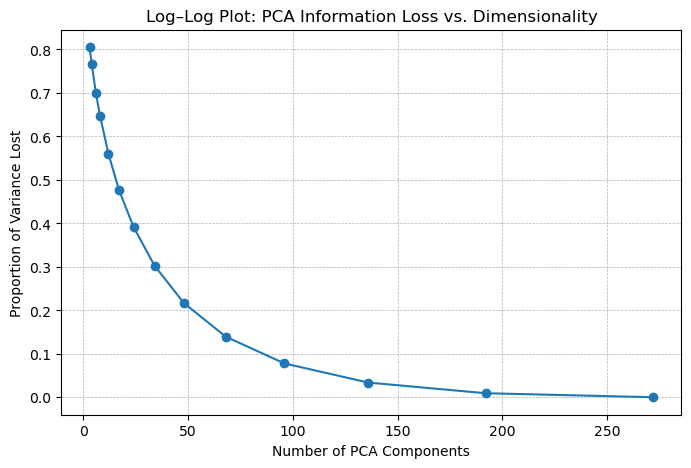

In [45]:
# Plot the information lost vs. number of components using a log-log plot.
plt.figure(figsize=(8, 5))
plt.plot(pca_dims, info_loss, marker="o")
plt.xlabel("Number of PCA Components")
plt.ylabel("Proportion of Variance Lost")
plt.title("Log–Log Plot: PCA Information Loss vs. Dimensionality")
# plt.xscale("log")
# plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [46]:
# Instantiate PCA to reduce the embeddings to 24 dimensions
pca = PCA(n_components=16)
reduced_embeddings = pca.fit_transform(embeddings)

# Append the 24 PCA dimensions to the DataFrame as new columns:
# pca_0, pca_1, ..., pca_23
for i in range(16):
    df[f'ind_pca_{i}'] = reduced_embeddings[:, i]

# Save the updated DataFrame back to the CSV file (overwriting it)
df.to_csv(data_path, index=False)